## Data Scientist : Rahul Mahimkar
## Date : 24/07/2020
## Objective : To predict the Air Quality levels for PM2.5, PM10 and NO for Central London
## Machine learning Algorithm used : Linear Regression , Neural Network and XGBoost
## Model Evaluation Metrics used : RMSE, MAE and Score R Squared
## How to run this notebook:
## Create a folder Air_Quality_Levels at default start directory of notebook and place the 5 input csv files within this folder
## Input file 1: Data_PM2.5 , 30 minutes interval data is captured in this file
## Input file 2: Data_PM10 ,  30 minutes interval data is captured in this file
## Input file 3: Data_NO , 30 minutes interval data is captured in this file
## Input file 4: Bands_Threshold, in this file user is allowed to specify the threshold levels
## Input file 5: SiteMapping , for example CT2 --> Farringdon Street
## Create a subfolder Output within folder Air_Quality_Levels, this is where output csv would be placed
## Go ahead and execute this notebook
   




# Lets start the case study analysis for PM 2.5

In [1]:
# Here we start the case study for PM 2.5

# Import Numpy , pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv for PM2.5 , data collected from 17th July 2018 till 16th July 2020 i.e. 2 years history data
# Data collection frequency : 15 minutes interval
df = pd.read_csv('Air_Quality_Levels/Data_PM2.5.csv')

# Label encode the site data values
from sklearn.preprocessing import LabelEncoder
le_site = LabelEncoder()
df["Site"] =le_site.fit_transform(df["Site"])
df.tail()

# We would be considering only 2 instances interval of minutes i.e. 00 and 30 , this frequency would be used for training data as well as for prediction 
# Here we are assuming that if we know the readings at 6 hour 00 minutes then we can predict the readings for 6 hours 30 minutes
# If we know the readings for 6 hours 30 minutes then we can predict the readings for 7 hours 00 minutes, so in this use case
# we have considered only 00 and 30 minutes data for study purpose
Minutes_filtered =[0,30]
df.Minutes.isin(Minutes_filtered)
df_30minute_data=df[df.Minutes.isin(Minutes_filtered)]
df.shape
df_30minute_data.shape
#df_30minute_data.tail()

(70176, 10)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.2696e+04, 1.2460e+03, 2.2000e+01, 4.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ -5. ,  39.6,  84.2, 128.8, 173.4, 218. , 262.6, 307.2, 351.8,
        396.4, 441. ]),
 <a list of 10 Patch objects>)

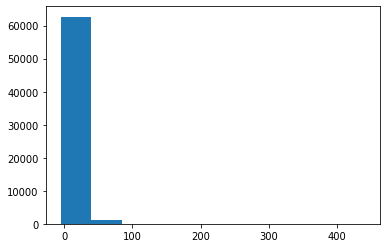

In [2]:
#Histogram plot for Value field

plt.hist(df_30minute_data["Value"])
# we can clearly see that most of the data distribution is around 0 to 50 and 
# slight extending the distribution till 100  but we can ignore the values post 100 which can be consider as Outliers


(array([53424.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16752.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

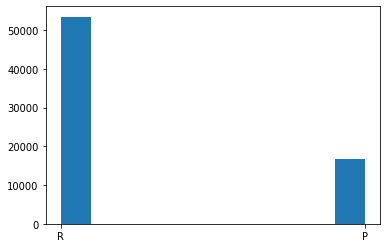

In [3]:

plt.hist(df_30minute_data["Provisional_Ratified"])

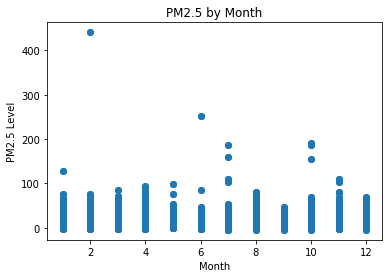

In [4]:
# Lets see the scatter splot between Month and Value

x = df_30minute_data['Month']
y = df_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()
# One more insight to confirm about outliers, till 100 range the distribution looks good , any values greater than 100 can be considered as Outliers

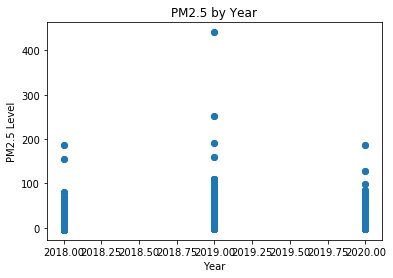

In [5]:
x = df_30minute_data['Year']
y = df_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Year')
plt.show()

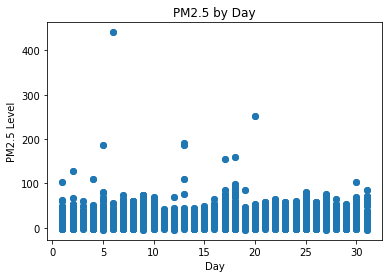

In [6]:
x = df_30minute_data['Day']
y = df_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Day')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Day')
plt.show()

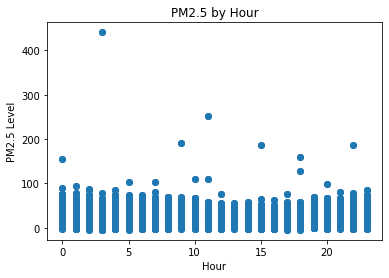

In [7]:
x = df_30minute_data['Hour']
y = df_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

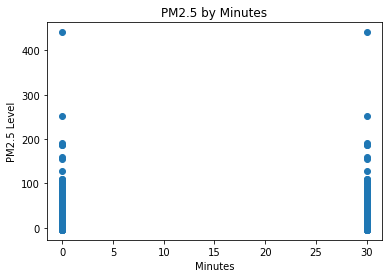

In [8]:
x = df_30minute_data['Minutes']
y = df_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Minutes')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Minutes')
plt.show()

In [9]:
# Show records where any cell has a NaN
df_30minute_data[df_30minute_data['Value'].isnull()]

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
532,0,PM2.5,2018,22,7,13,0,NaN,ug/m3,R
534,0,PM2.5,2018,22,7,13,30,NaN,ug/m3,R
536,0,PM2.5,2018,22,7,14,0,NaN,ug/m3,R
538,0,PM2.5,2018,22,7,14,30,NaN,ug/m3,R
540,0,PM2.5,2018,22,7,15,0,NaN,ug/m3,R
...,...,...,...,...,...,...,...,...,...,...
137426,1,PM2.5,2020,16,6,12,30,NaN,ug/m3,P
137428,1,PM2.5,2020,16,6,13,0,NaN,ug/m3,P
137430,1,PM2.5,2020,16,6,13,30,NaN,ug/m3,P
137432,1,PM2.5,2020,16,6,14,0,NaN,ug/m3,P


In [10]:
# Drop NA values for Value field

df_30minute_data_nonnull = df_30minute_data.dropna(axis=0,subset=['Value'])
df_30minute_data=df_30minute_data_nonnull
df_30minute_data.shape

(63978, 10)

In [11]:
# As per our Outlier study for PM2.5, consider values <= 100, anything which is greater than 100 is outlier

df_30minute_data_excludeOutliers =  df_30minute_data[df_30minute_data["Value"]<=100]
df_30minute_data_excludeOutliers
max(df_30minute_data_excludeOutliers["Value"])

df_30minute_data=df_30minute_data_excludeOutliers
df_30minute_data

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
0,0,PM2.5,2018,17,7,0,0,12.0,ug/m3,R
2,0,PM2.5,2018,17,7,0,30,12.0,ug/m3,R
4,0,PM2.5,2018,17,7,1,0,10.0,ug/m3,R
6,0,PM2.5,2018,17,7,1,30,10.0,ug/m3,R
8,0,PM2.5,2018,17,7,2,0,7.0,ug/m3,R
...,...,...,...,...,...,...,...,...,...,...
140342,1,PM2.5,2020,16,7,21,30,6.0,ug/m3,P
140344,1,PM2.5,2020,16,7,22,0,8.0,ug/m3,P
140346,1,PM2.5,2020,16,7,22,30,8.0,ug/m3,P
140348,1,PM2.5,2020,16,7,23,0,8.0,ug/m3,P


In [12]:
# lets create some features, lets add previous values features which would make our training process stronger

df_30minute_data['Value_1'] = df_30minute_data.Value.shift(periods=1)
df_30minute_data['Value_2'] = df_30minute_data.Value.shift(periods=2)
df_30minute_data['Value_3'] = df_30minute_data.Value.shift(periods=3)
df_30minute_data['Value_4'] = df_30minute_data.Value.shift(periods=4)
df_30minute_data['Value_5'] = df_30minute_data.Value.shift(periods=5)
df_30minute_data['Value_6'] = df_30minute_data.Value.shift(periods=6)
df_30minute_data['Value_7'] = df_30minute_data.Value.shift(periods=7)
df_30minute_data['Value_8'] = df_30minute_data.Value.shift(periods=8)
df_30minute_data['Value_9'] = df_30minute_data.Value.shift(periods=9)
df_30minute_data['Value_10'] = df_30minute_data.Value.shift(periods=10)
df_30minute_data['Value_11'] = df_30minute_data.Value.shift(periods=11)
df_30minute_data['Value_12'] = df_30minute_data.Value.shift(periods=12)
df_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,0,PM2.5,2018,17,7,0,0,12.0,ug/m3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,PM2.5,2018,17,7,0,30,12.0,ug/m3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,PM2.5,2018,17,7,1,0,10.0,ug/m3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,PM2.5,2018,17,7,1,30,10.0,ug/m3,R,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,PM2.5,2018,17,7,2,0,7.0,ug/m3,R,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140342,1,PM2.5,2020,16,7,21,30,6.0,ug/m3,P,...,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0,5.0
140344,1,PM2.5,2020,16,7,22,0,8.0,ug/m3,P,...,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0
140346,1,PM2.5,2020,16,7,22,30,8.0,ug/m3,P,...,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0
140348,1,PM2.5,2020,16,7,23,0,8.0,ug/m3,P,...,6.0,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0


In [13]:
# Just in case if there are any NA in newly created features then fill those with 0 value

df_30minute_data['Value_1'] = df_30minute_data.Value_1.fillna(value=0)
df_30minute_data['Value_2'] = df_30minute_data.Value_2.fillna(value=0)
df_30minute_data['Value_3'] = df_30minute_data.Value_3.fillna(value=0)
df_30minute_data['Value_4'] = df_30minute_data.Value_4.fillna(value=0)
df_30minute_data['Value_5'] = df_30minute_data.Value_5.fillna(value=0)
df_30minute_data['Value_6'] = df_30minute_data.Value_6.fillna(value=0)
df_30minute_data['Value_7'] = df_30minute_data.Value_7.fillna(value=0)
df_30minute_data['Value_8'] = df_30minute_data.Value_8.fillna(value=0)
df_30minute_data['Value_9'] = df_30minute_data.Value_9.fillna(value=0)
df_30minute_data['Value_10'] = df_30minute_data.Value_10.fillna(value=0)
df_30minute_data['Value_11'] = df_30minute_data.Value_11.fillna(value=0)
df_30minute_data['Value_12'] = df_30minute_data.Value_12.fillna(value=0)


df_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,0,PM2.5,2018,17,7,0,0,12.0,ug/m3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,PM2.5,2018,17,7,0,30,12.0,ug/m3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,PM2.5,2018,17,7,1,0,10.0,ug/m3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,PM2.5,2018,17,7,1,30,10.0,ug/m3,R,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,PM2.5,2018,17,7,2,0,7.0,ug/m3,R,...,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140342,1,PM2.5,2020,16,7,21,30,6.0,ug/m3,P,...,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0,5.0
140344,1,PM2.5,2020,16,7,22,0,8.0,ug/m3,P,...,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0
140346,1,PM2.5,2020,16,7,22,30,8.0,ug/m3,P,...,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0
140348,1,PM2.5,2020,16,7,23,0,8.0,ug/m3,P,...,6.0,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0


In [14]:
# Just in case if there are any NA values, Drop NA values for Value field
df_30minute_data_Filtered = df_30minute_data.dropna(axis=0,subset=['Value'])
df_30minute_data_Filtered.shape

(63954, 22)

In [15]:
# Reseting the index and dropping the un-necessary features
df_30minute_data_Filtered = df_30minute_data_Filtered.reset_index(drop=True)
df_30minute_data_Filtered
df_30minute_data_Filtered.dtypes
df_30minute_data_Filtered.shape
df_30minute_data_Filtered = df_30minute_data_Filtered.drop(['Species','Units','Provisional_Ratified'], axis=1)
df_30minute_data_Filtered.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value', 'Value_1',
       'Value_2', 'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7',
       'Value_8', 'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [145]:
# Preparing the X input features set and Y as target set

X = df_30minute_data_Filtered.drop(['Value'], axis=1)
Y = df_30minute_data_Filtered['Value']

In [146]:
X

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,0,2018,17,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2018,17,7,0,30,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2018,17,7,1,0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2018,17,7,1,30,10.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2018,17,7,2,0,10.0,10.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63949,1,2020,16,7,21,30,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0,5.0
63950,1,2020,16,7,22,0,6.0,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0,5.0
63951,1,2020,16,7,22,30,8.0,6.0,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0,5.0
63952,1,2020,16,7,23,0,8.0,8.0,6.0,6.0,9.0,9.0,10.0,10.0,6.0,6.0,3.0,3.0


In [147]:
#Just checking if there is any Null values in Y target set

Y.isnull().values.any()

False

In [148]:
# Spliting into training and testing set using sklearn model selection

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=1234)

In [149]:
# Checking the shape of splits datasets
X_train.shape,Y_train.shape

((44767, 18), (44767,))

In [150]:
X_test.shape,Y_test.shape

((19187, 18), (19187,))

In [151]:
# Checking the input features names
X.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value_1', 'Value_2',
       'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7', 'Value_8',
       'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [164]:
# Now Lets go for Machine learning Neural network - Multi layer Perceptron Regression
from sklearn.neural_network import MLPRegressor

# Importing the evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [165]:
# Train / Fit the model using the training sets
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [166]:
# Score the model
neural_network_regression_score = mlp.score(X_test, Y_test)
neural_network_regression_score

# Before removing Outlier the score was 0.78, post removing Outlier the score is improved a lot i.e. 0.86

0.8586104022898696

In [167]:
# Lets check how XGBoost algorithm performs on this data

# Import XGBoost and XGBRegressor
import xgboost
from xgboost import XGBRegressor

In [168]:
# Create XGBRegressor object
xgboostReg = XGBRegressor()

In [169]:
#Fitting XGB regressor  - training the model
xgboostReg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [170]:
# Scoring the XGBoost Model
xgb_score = xgboostReg.score(X_test, Y_test)
xgb_score


# Before removing Outlier the score was 0.75, post removing Outlier the score is improved a lot i.e. 0.88

0.8791842642846286

In [171]:
# Lets check how Linear Regression algorithm performs on this data

# Importing LinearRegression from sklearn linear_model
from sklearn.linear_model import LinearRegression

In [172]:
# Create linear regression object
regr = LinearRegression()

In [173]:
# Train/Fit the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
#Scoring the Model
linear_regression_score = regr.score(X_test, Y_test)
linear_regression_score
# Before removing Outlier the score was 0.75, post removing Outlier the score is improved a lot i.e. 0.84

0.8450678976595167

# Model Evaluation Comparision: PM 2.5

# Linear Regression Score  : 0.84
# Neural Network Score       : 0.86
# XGBoost Score                  : 0.88

# Hence lets proceed with XGBoost Model

In [175]:
#Make predictions for the testing set using XGBoost trained model
pred = xgboostReg.predict(X_test)

In [176]:
X_test.shape
X_test.isnull().values.any()

False

In [177]:
Y_test

# Concatenate X test and Y test dataset and call it out as test data
test_data =pd.concat([X_test,Y_test], axis=1)
test_data

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value
43597,1,2019,4,3,13,30,7.0,10.0,10.0,10.0,10.0,8.0,8.0,10.0,10.0,8.0,8.0,-1.0,7.0
1437,0,2018,17,8,15,30,8.0,11.0,11.0,14.0,14.0,9.0,9.0,8.0,8.0,8.0,8.0,11.0,8.0
48839,1,2019,28,7,4,30,2.0,3.0,3.0,3.0,3.0,3.0,3.0,32.0,32.0,4.0,4.0,5.0,2.0
8161,0,2019,24,1,2,0,35.0,35.0,27.0,27.0,24.0,24.0,25.0,25.0,24.0,24.0,22.0,22.0,33.0
48100,1,2019,12,7,5,0,4.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,0,2019,25,1,11,30,29.0,30.0,30.0,32.0,32.0,28.0,28.0,22.0,22.0,28.0,28.0,26.0,29.0
21925,0,2019,15,11,4,30,16.0,13.0,13.0,14.0,14.0,16.0,16.0,14.0,14.0,16.0,16.0,15.0,16.0
63748,1,2020,12,7,17,0,8.0,8.0,13.0,13.0,8.0,8.0,7.0,7.0,11.0,11.0,12.0,12.0,11.0
309,0,2018,23,7,13,30,11.0,20.0,20.0,15.0,15.0,11.0,11.0,12.0,12.0,14.0,14.0,18.0,11.0


In [178]:
#Convert the predictions into Dataframe

Prediction = pd.DataFrame(data=pred, columns=["Prediction"])
Prediction
Prediction.isnull().values.any()

False

In [179]:
# Reset index to concatenate to appropraite rows , concatenate predicted values to test data
Actual_Prediction_X_testdata_XGBoost = pd.concat([test_data.reset_index(drop='True'),Prediction.reset_index(drop='True')],axis=1)

In [180]:
Actual_Prediction_X_testdata_XGBoost

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value,Prediction
0,1,2019,4,3,13,30,7.0,10.0,10.0,10.0,10.0,8.0,8.0,10.0,10.0,8.0,8.0,-1.0,7.0,6.813190
1,0,2018,17,8,15,30,8.0,11.0,11.0,14.0,14.0,9.0,9.0,8.0,8.0,8.0,8.0,11.0,8.0,8.033869
2,1,2019,28,7,4,30,2.0,3.0,3.0,3.0,3.0,3.0,3.0,32.0,32.0,4.0,4.0,5.0,2.0,1.944939
3,0,2019,24,1,2,0,35.0,35.0,27.0,27.0,24.0,24.0,25.0,25.0,24.0,24.0,22.0,22.0,33.0,28.129536
4,1,2019,12,7,5,0,4.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.125511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19182,0,2019,25,1,11,30,29.0,30.0,30.0,32.0,32.0,28.0,28.0,22.0,22.0,28.0,28.0,26.0,29.0,27.539970
19183,0,2019,15,11,4,30,16.0,13.0,13.0,14.0,14.0,16.0,16.0,14.0,14.0,16.0,16.0,15.0,16.0,15.952781
19184,1,2020,12,7,17,0,8.0,8.0,13.0,13.0,8.0,8.0,7.0,7.0,11.0,11.0,12.0,12.0,11.0,8.042635
19185,0,2018,23,7,13,30,11.0,20.0,20.0,15.0,15.0,11.0,11.0,12.0,12.0,14.0,14.0,18.0,11.0,10.961452


In [181]:
# We have selected the best model as XGBoost and evaluating the model using below metrics

from math import *
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(Y_test, pred))

# Source dataset Values are in the range from ~0 to ~ 100 and the RMSE is just around ~3 which is a very good model performance


Root mean squared error: 3.10
Mean absolute error: 1.61
R-squared: 0.88


In [182]:
#Sort the values and drop the un-necessary variables before writing the final output to csv file

Actual_Prediction_X_testdata_XGBoost_v1 = Actual_Prediction_X_testdata_XGBoost.sort_values(["Site","Year","Month","Day","Hour","Minutes"], ascending=True)
Actual_Prediction_X_testdata_XGBoost
Actual_Prediction_X_testdata_XGBoost=Actual_Prediction_X_testdata_XGBoost_v1.drop(["Value_1","Value_2","Value_3","Value_4","Value_5","Value_6","Value_7","Value_8","Value_9","Value_10","Value_11","Value_12"],axis=1)

In [183]:
# Label encoding was done earlier , before writing to csv file we need to get the original Site name mapping again
Actual_Prediction_X_testdata_XGBoost["Site"]= le_site.inverse_transform(Actual_Prediction_X_testdata_XGBoost["Site"])
Actual_Prediction_X_testdata_XGBoost["Prediction"]=Actual_Prediction_X_testdata_XGBoost["Prediction"].round(decimals=0)
Actual_Prediction_X_testdata_XGBoost

,Site,Year,Day,Month,Hour,Minutes,Value,Prediction
5466,CT2,2018,17,7,0,0,12.0,7.0
6271,CT2,2018,17,7,2,0,7.0,8.0
4550,CT2,2018,17,7,6,30,7.0,7.0
123,CT2,2018,17,7,7,0,9.0,8.0
18648,CT2,2018,17,7,12,0,15.0,10.0
...,...,...,...,...,...,...,...,...
8749,CT3,2020,16,7,7,0,6.0,7.0
9878,CT3,2020,16,7,13,0,10.0,10.0
6131,CT3,2020,16,7,16,30,5.0,5.0
7559,CT3,2020,16,7,20,0,9.0,8.0


In [184]:
# We will use this PM2.5 dataframe Actual_Prediction_X_testdata_XGBoost at the end to merge with other dataframe to get the Band and Threshold levels

# Lets start the case study analysis for PM 10


In [185]:
# Here we start the case study for PM 10


# Read the csv for PM10 , data collected from 17th Dec 2018 till 16th July 2020 i.e. 1.5 years history data, 
# due to data issues at source website was not able to extract 2 years whole data
# Data collection frequency : 15 minutes interval
df_pm10 = pd.read_csv('Air_Quality_Levels/Data_PM10.csv')

# Label encode the site data values
from sklearn.preprocessing import LabelEncoder
le_site_pm10 = LabelEncoder()
df_pm10["Site"] =le_site_pm10.fit_transform(df_pm10["Site"])
df_pm10.tail()

# We would be considering only 2 interval of minutes i.e. 0 and 30 , this frequency would be used for training data as well as for prediction 
# Here we are assuming that if we know the readings at 6 hour 00 minutes then we can predict the readings for 6 hours 30 minutes
# If we know the readings for 6 hours 30 minutes then we can predict the readings for 7 hours 00 minutes, so in this use case
# we have considered only 0 and 30 minutes data for study purpose
Minutes_filtered =[0,30]
df_pm10.Minutes.isin(Minutes_filtered)
df_pm10_30minute_data=df_pm10[df_pm10.Minutes.isin(Minutes_filtered)]
df_pm10.shape
df_pm10_30minute_data.shape


(110976, 10)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.6694e+04, 2.7200e+02, 1.9000e+01, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -8.4 ,  83.14, 174.68, 266.22, 357.76, 449.3 , 540.84, 632.38,
        723.92, 815.46, 907.  ]),
 <a list of 10 Patch objects>)

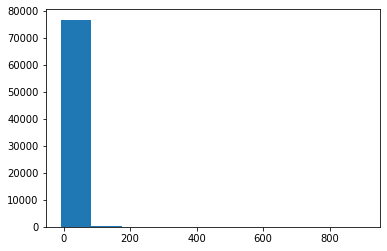

In [186]:
# Histogram plot for Value field
plt.hist(df_pm10_30minute_data["Value"])
# Looks like values greater than 200 should be considered as Outliers

(array([57024.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 53952.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

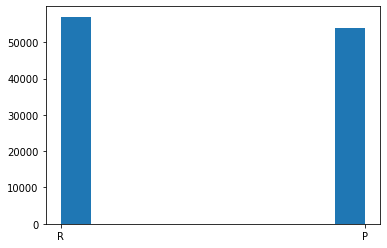

In [187]:
plt.hist(df_pm10_30minute_data["Provisional_Ratified"])

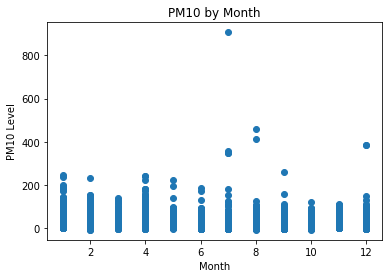

In [188]:
# Scatter plot between Month and Value
x = df_pm10_30minute_data['Month']
y = df_pm10_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM10 Level')
plt.title('PM10 by Month')
plt.show()
# One more insight to confirm about outliers, till 200 range the distribution is visible , any values greater than 200 can be considered as Outliers

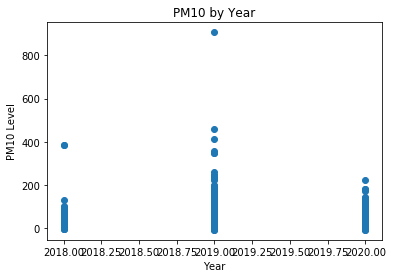

In [189]:
x = df_pm10_30minute_data['Year']
y = df_pm10_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('PM10 Level')
plt.title('PM10 by Year')
plt.show()

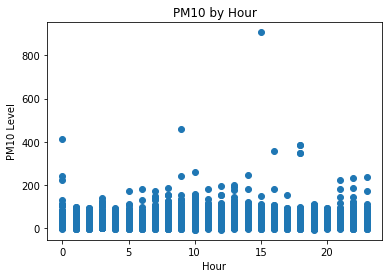

In [190]:
x = df_pm10_30minute_data['Hour']
y = df_pm10_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM10 Level')
plt.title('PM10 by Hour')
plt.show()

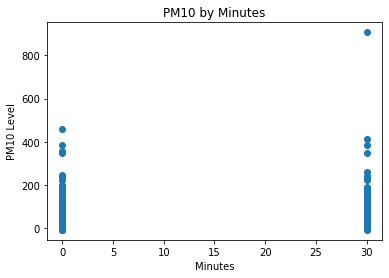

In [191]:
x = df_pm10_30minute_data['Minutes']
y = df_pm10_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Minutes')
plt.ylabel('PM10 Level')
plt.title('PM10 by Minutes')
plt.show()

In [192]:
# Show records where any cell has a NA
df_pm10_30minute_data[df_pm10_30minute_data['Value'].isnull()]

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
1682,2,PM10,2019,3,1,12,30,NaN,ug m-3 reference equiv by VCM,R
2360,2,PM10,2019,10,1,14,0,NaN,ug m-3 reference equiv by VCM,R
2362,2,PM10,2019,10,1,14,30,NaN,ug m-3 reference equiv by VCM,R
2944,2,PM10,2019,16,1,16,0,NaN,ug m-3 reference equiv by VCM,R
3008,2,PM10,2019,17,1,8,0,NaN,ug m-3 reference equiv by VCM,R
...,...,...,...,...,...,...,...,...,...,...
221942,3,PM10,2020,16,7,21,30,NaN,ug/m3,P
221944,3,PM10,2020,16,7,22,0,NaN,ug/m3,P
221946,3,PM10,2020,16,7,22,30,NaN,ug/m3,P
221948,3,PM10,2020,16,7,23,0,NaN,ug/m3,P


In [193]:
# Drop NA values for Value field

df_pm10_30minute_data_nonnull = df_pm10_30minute_data.dropna(axis=0,subset=['Value'])
df_pm10_30minute_data=df_pm10_30minute_data_nonnull
df_pm10_30minute_data.shape

(76993, 10)

In [194]:
# As per our Outlier study for PM10, consider values <= 200, anything which is greater than 200 is outlier

df_pm10_30minute_data_excludeOutliers =    df_pm10_30minute_data[df_pm10_30minute_data["Value"]<=200]
df_pm10_30minute_data_excludeOutliers
max(df_pm10_30minute_data_excludeOutliers["Value"])

df_pm10_30minute_data=df_pm10_30minute_data_excludeOutliers
df_pm10_30minute_data

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
0,2,PM10,2018,17,12,0,0,6.8,ug m-3 reference equiv by VCM,R
2,2,PM10,2018,17,12,0,30,5.9,ug m-3 reference equiv by VCM,R
4,2,PM10,2018,17,12,1,0,2.3,ug m-3 reference equiv by VCM,R
6,2,PM10,2018,17,12,1,30,2.3,ug m-3 reference equiv by VCM,R
8,2,PM10,2018,17,12,2,0,5.0,ug m-3 reference equiv by VCM,R
...,...,...,...,...,...,...,...,...,...,...
221262,3,PM10,2020,9,7,19,30,11.0,ug/m3,P
221264,3,PM10,2020,9,7,20,0,9.0,ug/m3,P
221266,3,PM10,2020,9,7,20,30,9.0,ug/m3,P
221268,3,PM10,2020,9,7,21,0,8.0,ug/m3,P


In [195]:
# lets create some features, lets add previous values features which would make our training process stronger
df_pm10_30minute_data['Value_1'] = df_pm10_30minute_data.Value.shift(periods=1)
df_pm10_30minute_data['Value_2'] = df_pm10_30minute_data.Value.shift(periods=2)
df_pm10_30minute_data['Value_3'] = df_pm10_30minute_data.Value.shift(periods=3)
df_pm10_30minute_data['Value_4'] = df_pm10_30minute_data.Value.shift(periods=4)
df_pm10_30minute_data['Value_5'] = df_pm10_30minute_data.Value.shift(periods=5)
df_pm10_30minute_data['Value_6'] = df_pm10_30minute_data.Value.shift(periods=6)
df_pm10_30minute_data['Value_7'] = df_pm10_30minute_data.Value.shift(periods=7)
df_pm10_30minute_data['Value_8'] = df_pm10_30minute_data.Value.shift(periods=8)
df_pm10_30minute_data['Value_9'] = df_pm10_30minute_data.Value.shift(periods=9)
df_pm10_30minute_data['Value_10'] = df_pm10_30minute_data.Value.shift(periods=10)
df_pm10_30minute_data['Value_11'] = df_pm10_30minute_data.Value.shift(periods=11)
df_pm10_30minute_data['Value_12'] = df_pm10_30minute_data.Value.shift(periods=12)
df_pm10_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,PM10,2018,17,12,0,0,6.8,ug m-3 reference equiv by VCM,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,PM10,2018,17,12,0,30,5.9,ug m-3 reference equiv by VCM,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,PM10,2018,17,12,1,0,2.3,ug m-3 reference equiv by VCM,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,PM10,2018,17,12,1,30,2.3,ug m-3 reference equiv by VCM,R,...,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,PM10,2018,17,12,2,0,5.0,ug m-3 reference equiv by VCM,R,...,5.9,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221262,3,PM10,2020,9,7,19,30,11.0,ug/m3,P,...,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0,29.0
221264,3,PM10,2020,9,7,20,0,9.0,ug/m3,P,...,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0
221266,3,PM10,2020,9,7,20,30,9.0,ug/m3,P,...,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0
221268,3,PM10,2020,9,7,21,0,8.0,ug/m3,P,...,11.0,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0


In [196]:
# Just in case if there are any NA in newly created features then fill those with 0 value
df_pm10_30minute_data['Value_1'] = df_pm10_30minute_data.Value_1.fillna(value=0)
df_pm10_30minute_data['Value_2'] = df_pm10_30minute_data.Value_2.fillna(value=0)
df_pm10_30minute_data['Value_3'] = df_pm10_30minute_data.Value_3.fillna(value=0)
df_pm10_30minute_data['Value_4'] = df_pm10_30minute_data.Value_4.fillna(value=0)
df_pm10_30minute_data['Value_5'] = df_pm10_30minute_data.Value_5.fillna(value=0)
df_pm10_30minute_data['Value_6'] = df_pm10_30minute_data.Value_6.fillna(value=0)
df_pm10_30minute_data['Value_7'] = df_pm10_30minute_data.Value_7.fillna(value=0)
df_pm10_30minute_data['Value_8'] = df_pm10_30minute_data.Value_8.fillna(value=0)
df_pm10_30minute_data['Value_9'] = df_pm10_30minute_data.Value_9.fillna(value=0)
df_pm10_30minute_data['Value_10'] = df_pm10_30minute_data.Value_10.fillna(value=0)
df_pm10_30minute_data['Value_11'] = df_pm10_30minute_data.Value_11.fillna(value=0)
df_pm10_30minute_data['Value_12'] = df_pm10_30minute_data.Value_12.fillna(value=0)


df_pm10_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,PM10,2018,17,12,0,0,6.8,ug m-3 reference equiv by VCM,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,PM10,2018,17,12,0,30,5.9,ug m-3 reference equiv by VCM,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,PM10,2018,17,12,1,0,2.3,ug m-3 reference equiv by VCM,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,PM10,2018,17,12,1,30,2.3,ug m-3 reference equiv by VCM,R,...,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,PM10,2018,17,12,2,0,5.0,ug m-3 reference equiv by VCM,R,...,5.9,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221262,3,PM10,2020,9,7,19,30,11.0,ug/m3,P,...,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0,29.0
221264,3,PM10,2020,9,7,20,0,9.0,ug/m3,P,...,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0
221266,3,PM10,2020,9,7,20,30,9.0,ug/m3,P,...,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0
221268,3,PM10,2020,9,7,21,0,8.0,ug/m3,P,...,11.0,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0


In [197]:
# Just in case if there are any NA values, Drop NA values for Value field
df_pm10_30minute_data_Filtered = df_pm10_30minute_data.dropna(axis=0,subset=['Value'])
df_pm10_30minute_data_Filtered.shape

(76977, 22)

In [198]:
# Reseting the index and dropping the un-necessary features
df_pm10_30minute_data_Filtered = df_pm10_30minute_data_Filtered.reset_index(drop=True)
df_pm10_30minute_data_Filtered
df_pm10_30minute_data_Filtered.dtypes
df_pm10_30minute_data_Filtered.shape
df_pm10_30minute_data_Filtered = df_pm10_30minute_data_Filtered.drop(['Species','Units','Provisional_Ratified'], axis=1)
df_pm10_30minute_data_Filtered.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value', 'Value_1',
       'Value_2', 'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7',
       'Value_8', 'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [199]:
# Preparing the X input features set and Y as target set
X = df_pm10_30minute_data_Filtered.drop(['Value'], axis=1)
Y = df_pm10_30minute_data_Filtered['Value']

In [200]:
X

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,2018,17,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,17,12,0,30,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018,17,12,1,0,5.9,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2018,17,12,1,30,2.3,5.9,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2018,17,12,2,0,2.3,2.3,5.9,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76972,3,2020,9,7,19,30,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0,29.0
76973,3,2020,9,7,20,0,11.0,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0,14.0
76974,3,2020,9,7,20,30,9.0,11.0,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0,14.0
76975,3,2020,9,7,21,0,9.0,9.0,11.0,11.0,14.0,14.0,14.0,14.0,19.0,19.0,17.0,17.0


In [201]:
Y

0         6.8
1         5.9
2         2.3
3         2.3
4         5.0
         ... 
76972    11.0
76973     9.0
76974     9.0
76975     8.0
76976     8.0
Name: Value, Length: 76977, dtype: float64

In [202]:
#Just checking if there is any Null values in Y target set
Y.isnull().values.any()

False

In [203]:
# Spliting into training and testing set using sklearn model selection

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=1234)

In [204]:
# Checking the shape of splits datasets
X_train.shape,Y_train.shape

((53883, 18), (53883,))

In [205]:
X_test.shape,Y_test.shape

((23094, 18), (23094,))

In [206]:
# Checking the input features names
X.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value_1', 'Value_2',
       'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7', 'Value_8',
       'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [212]:
# Now Lets go for Machine learning Neural network - Multi layer Perceptron Regression

from sklearn.neural_network import MLPRegressor

#Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp_pm10 = MLPRegressor()

In [213]:
# Training/Fitting the model
mlp_pm10.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [214]:
# Score the model
neural_network_regression_score = mlp_pm10.score(X_test, Y_test)
neural_network_regression_score

# Before removing Outlier score was 0.72, post outliers removal score is improved  i.e. 0.77

0.7660678174960036

In [215]:
# Lets check how Linear Regression algorithm performs on this data

# Importing LinearRegression from sklearn linear_model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

In [216]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
#Score the Model
linear_regression_score = regr.score(X_test, Y_test)
linear_regression_score

# Before Outlier removal score was 0.68 , post outlier removal score is improved i.e. 0.76

0.75939108887857

In [218]:
# Lets check how XGBoost algorithm performs on this data

# Import XGBoost and XGBRegressor
import xgboost
from xgboost import XGBRegressor

#Creating the XGB regressor object
xgboostReg_PM10 = XGBRegressor()

In [219]:
# Fitting/Training the model using training sets
xgboostReg_PM10.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [220]:
#Score the Model
xgb_score = xgboostReg_PM10.score(X_test, Y_test)
xgb_score

# Before Outlier removal score was 0.68 , post outlier removal score is improved i.e. 0.77 

0.7697041475880179

# Model Evaluation Comparision: PM 10

# Linear Regression Score : 0.759
# Neural Network Score      : 0.768
# XGBoost Score                 : 0.769

# Hence lets proceed with XGBoost Model

In [221]:
#Make predictions for the testing set using XGBoost trained model
pred = xgboostReg_PM10.predict(X_test)

In [222]:
X_test.shape
X_test.isnull().values.any()

False

In [223]:
Y_test

# Concatenate X test and Y test dataset and call it out as test data
test_data =pd.concat([X_test,Y_test], axis=1)
test_data

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value
49097,1,2020,13,4,2,0,13.0,13.0,12.0,12.0,24.0,24.0,26.0,26.0,17.0,17.0,7.0,7.0,14.0
47998,1,2020,3,3,12,0,18.0,18.0,20.0,20.0,16.0,16.0,18.0,18.0,13.0,13.0,13.0,13.0,22.0
36881,1,2019,13,7,10,0,12.0,12.0,12.0,12.0,8.0,8.0,8.0,8.0,5.0,5.0,2.0,2.0,11.0
57126,3,2019,19,4,5,30,52.0,50.0,47.0,48.0,42.0,42.0,40.0,41.0,42.0,43.0,49.0,49.0,50.0
9223,2,2019,6,7,22,0,19.9,21.1,16.5,16.2,14.1,8.5,13.6,14.1,11.4,20.7,12.4,7.4,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,1,2020,22,6,16,30,13.0,20.0,20.0,14.0,14.0,15.0,15.0,21.0,21.0,15.0,15.0,15.0,13.0
55278,3,2019,29,1,3,0,26.0,26.0,31.0,33.0,48.0,57.0,58.0,47.0,60.0,38.0,48.0,43.0,23.0
55632,3,2019,18,3,9,30,56.0,48.0,47.0,46.0,41.0,37.0,40.0,30.0,35.0,31.0,18.0,15.0,53.0
75087,3,2020,24,5,12,0,24.0,24.0,18.0,18.0,20.0,20.0,22.0,22.0,26.0,26.0,21.0,21.0,15.0


In [224]:
#Convert the predictions into Dataframe
Prediction = pd.DataFrame(data=pred, columns=["Prediction"])
Prediction
Prediction.isnull().values.any()

False

In [225]:
# Reset index to concatenate to appropraite rows , concatenate predicted values to test data
PM10_Actual_Prediction_X_testdata_XGBoost = pd.concat([test_data.reset_index(drop='True'),Prediction.reset_index(drop='True')],axis=1)
PM10_Actual_Prediction_X_testdata_XGBoost

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value,Prediction
0,1,2020,13,4,2,0,13.0,13.0,12.0,12.0,24.0,24.0,26.0,26.0,17.0,17.0,7.0,7.0,14.0,13.428349
1,1,2020,3,3,12,0,18.0,18.0,20.0,20.0,16.0,16.0,18.0,18.0,13.0,13.0,13.0,13.0,22.0,17.991287
2,1,2019,13,7,10,0,12.0,12.0,12.0,12.0,8.0,8.0,8.0,8.0,5.0,5.0,2.0,2.0,11.0,11.829267
3,3,2019,19,4,5,30,52.0,50.0,47.0,48.0,42.0,42.0,40.0,41.0,42.0,43.0,49.0,49.0,50.0,53.937531
4,2,2019,6,7,22,0,19.9,21.1,16.5,16.2,14.1,8.5,13.6,14.1,11.4,20.7,12.4,7.4,13.5,19.208055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23089,1,2020,22,6,16,30,13.0,20.0,20.0,14.0,14.0,15.0,15.0,21.0,21.0,15.0,15.0,15.0,13.0,13.059348
23090,3,2019,29,1,3,0,26.0,26.0,31.0,33.0,48.0,57.0,58.0,47.0,60.0,38.0,48.0,43.0,23.0,29.413338
23091,3,2019,18,3,9,30,56.0,48.0,47.0,46.0,41.0,37.0,40.0,30.0,35.0,31.0,18.0,15.0,53.0,56.491070
23092,3,2020,24,5,12,0,24.0,24.0,18.0,18.0,20.0,20.0,22.0,22.0,26.0,26.0,21.0,21.0,15.0,23.169394


In [226]:
# We have selected the best model as XGBoost and evaluating the model using below metrics

from math import *
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(Y_test, pred))

# Source dataset Values are in the range from ~0 to ~ 200 and the RMSE is just around ~6 which is a very good model performance

Root mean squared error: 6.64
Mean absolute error: 3.72
R-squared: 0.77


In [227]:
#Sort the values and drop the un-necessary variables before writing the final output to csv file

PM10_Actual_Prediction_X_testdata_XGBoost_v1 = PM10_Actual_Prediction_X_testdata_XGBoost.sort_values(["Site","Year","Month","Day","Hour","Minutes"], ascending=True)

PM10_Actual_Prediction_X_testdata_XGBoost=PM10_Actual_Prediction_X_testdata_XGBoost_v1.drop(["Value_1","Value_2","Value_3","Value_4","Value_5","Value_6","Value_7","Value_8","Value_9","Value_10","Value_11","Value_12"],axis=1)

In [228]:
# Label encoding was done earlier , before writing to csv file we need to get the original Site name mapping again

PM10_Actual_Prediction_X_testdata_XGBoost["Site"]= le_site_pm10.inverse_transform(PM10_Actual_Prediction_X_testdata_XGBoost["Site"])
PM10_Actual_Prediction_X_testdata_XGBoost["Prediction"]=PM10_Actual_Prediction_X_testdata_XGBoost["Prediction"].round(decimals=0)

In [229]:
# We will use this PM10 dataframe PM10_Actual_Prediction_X_testdata_XGBoost at the end to merge with other dataframe to get the Band and Threshold levels

# Lets start the case study analysis for NO

In [230]:
# Here we start the case study for PM 2.5

# Read the csv for NO , data collected from 17th July 2018 till 16th July 2020 i.e. 2 years history data
# Data collection frequency : 15 minutes interval
df_NO = pd.read_csv('Air_Quality_Levels/Data_NO.csv')

# Label encode the site data values
from sklearn.preprocessing import LabelEncoder
le_site_NO = LabelEncoder()
df_NO["Site"] =le_site_NO.fit_transform(df_NO["Site"])
df_NO.tail()

# We would be considering only 2 interval of minutes i.e. 0 and 30 , this frequency would be used for training data as well as for prediction 
# Here we are assuming that if we know the readings at 6 hour 00 minutes then we can predict the readings for 6 hours 30 minutes
# If we know the readings for 6 hours 30 minutes then we can predict the readings for 7 hours 00 minutes, so in this use case
# we have considered only 0 and 30 minutes data for study purpose
Minutes_filtered =[0,30]
df_NO.Minutes.isin(Minutes_filtered)
df_NO_30minute_data=df_NO[df_NO.Minutes.isin(Minutes_filtered)]
df_NO.shape
df_NO_30minute_data.shape
#df_30minute_data.tail()

(140352, 10)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.0545e+04, 8.4730e+03, 1.6260e+03, 3.8900e+02, 8.0000e+01,
        1.7000e+01, 1.1000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -8.4 ,  111.99,  232.38,  352.77,  473.16,  593.55,  713.94,
         834.33,  954.72, 1075.11, 1195.5 ]),
 <a list of 10 Patch objects>)

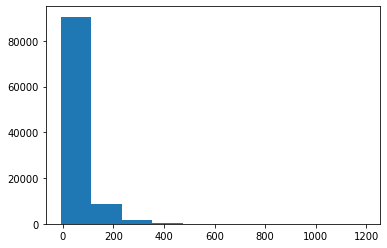

In [231]:
# Histogram for Value field
plt.hist(df_NO_30minute_data["Value"])

# Looks like values more than 600 should be considered as Outlier, lets view some more graphs to conclude this

(array([76752.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 63600.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

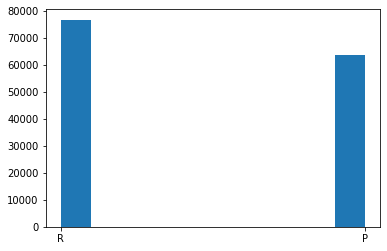

In [232]:
#plt.hist(df_30minute_data["Provisional_Ratified"])
plt.hist(df_NO_30minute_data["Provisional_Ratified"])

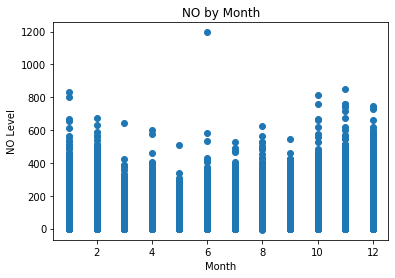

In [233]:
#Scatter plot between Month and Value
x = df_NO_30minute_data['Month']
y = df_NO_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('NO Level')
plt.title('NO by Month')
plt.show()
# One more insight to confirm about outliers, till 650 range the distribution looks good , any values greater than 650 can be considered as Outliers

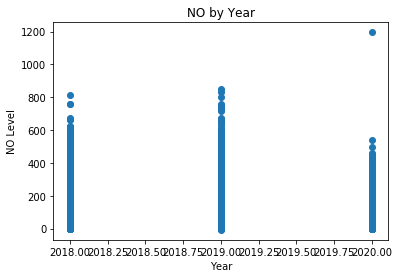

In [234]:
x = df_NO_30minute_data['Year']
y = df_NO_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('NO Level')
plt.title('NO by Year')
plt.show()

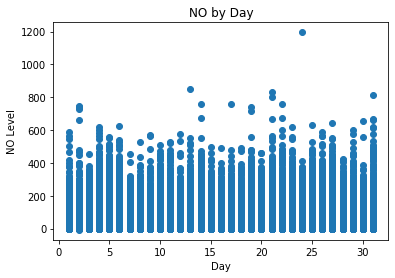

In [235]:
x = df_NO_30minute_data['Day']
y = df_NO_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Day')
plt.ylabel('NO Level')
plt.title('NO by Day')
plt.show()

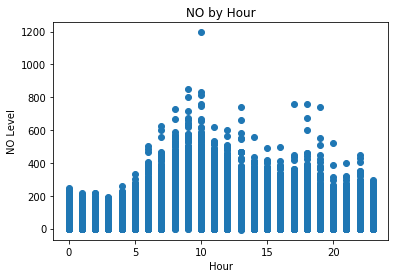

In [236]:
x = df_NO_30minute_data['Hour']
y = df_NO_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('NO Level')
plt.title('NO by Hour')
plt.show()

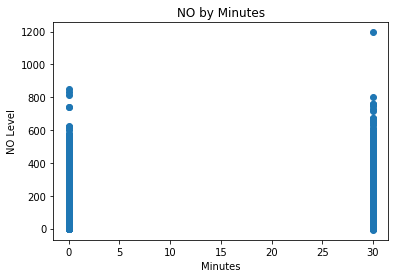

In [237]:
x = df_NO_30minute_data['Minutes']
y = df_NO_30minute_data['Value']
plt.scatter(x,y)
plt.xlabel('Minutes')
plt.ylabel('NO Level')
plt.title('NO by Minutes')
plt.show()

In [238]:
# Show records where any cell has a NaN
df_NO_30minute_data[df_NO_30minute_data['Value'].isnull()]

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
4,2,NO,2018,17,7,1,0,NaN,ug m-3,R
102,2,NO,2018,18,7,1,30,NaN,ug m-3,R
196,2,NO,2018,19,7,1,0,NaN,ug m-3,R
230,2,NO,2018,19,7,9,30,NaN,ug m-3,R
232,2,NO,2018,19,7,10,0,NaN,ug m-3,R
...,...,...,...,...,...,...,...,...,...,...
280228,3,NO,2020,12,7,1,0,NaN,ug m-3,P
280324,3,NO,2020,13,7,1,0,NaN,ug m-3,P
280420,3,NO,2020,14,7,1,0,NaN,ug m-3,P
280516,3,NO,2020,15,7,1,0,NaN,ug m-3,P


In [239]:
# Drop NA values for Value field
df_NO_30minute_data_nonnull = df_NO_30minute_data.dropna(axis=0,subset=['Value'])
df_NO_30minute_data=df_NO_30minute_data_nonnull
df_NO_30minute_data.shape

(101143, 10)

In [240]:
# As per our Outlier study for NO, consider values <= 650, anything which is greater than 650 is outlier

df_NO_30minute_data_excludeOutliers =    df_NO_30minute_data[df_NO_30minute_data["Value"]<=650]
df_NO_30minute_data_excludeOutliers
max(df_NO_30minute_data_excludeOutliers["Value"])

df_NO_30minute_data=df_NO_30minute_data_excludeOutliers
df_NO_30minute_data

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified
0,2,NO,2018,17,7,0,0,3.4,ug m-3,R
2,2,NO,2018,17,7,0,30,7.7,ug m-3,R
6,2,NO,2018,17,7,1,30,1.3,ug m-3,R
8,2,NO,2018,17,7,2,0,3.0,ug m-3,R
10,2,NO,2018,17,7,2,30,1.4,ug m-3,R
...,...,...,...,...,...,...,...,...,...,...
280694,3,NO,2020,16,7,21,30,17.4,ug m-3,P
280696,3,NO,2020,16,7,22,0,4.8,ug m-3,P
280698,3,NO,2020,16,7,22,30,3.6,ug m-3,P
280700,3,NO,2020,16,7,23,0,6.7,ug m-3,P


In [241]:
# lets create some features, lets add previous values features which would make our training process stronger
df_NO_30minute_data['Value_1'] = df_NO_30minute_data.Value.shift(periods=1)
df_NO_30minute_data['Value_2'] = df_NO_30minute_data.Value.shift(periods=2)
df_NO_30minute_data['Value_3'] = df_NO_30minute_data.Value.shift(periods=3)
df_NO_30minute_data['Value_4'] = df_NO_30minute_data.Value.shift(periods=4)
df_NO_30minute_data['Value_5'] = df_NO_30minute_data.Value.shift(periods=5)
df_NO_30minute_data['Value_6'] = df_NO_30minute_data.Value.shift(periods=6)
df_NO_30minute_data['Value_7'] = df_NO_30minute_data.Value.shift(periods=7)
df_NO_30minute_data['Value_8'] = df_NO_30minute_data.Value.shift(periods=8)
df_NO_30minute_data['Value_9'] = df_NO_30minute_data.Value.shift(periods=9)
df_NO_30minute_data['Value_10'] = df_NO_30minute_data.Value.shift(periods=10)
df_NO_30minute_data['Value_11'] = df_NO_30minute_data.Value.shift(periods=11)
df_NO_30minute_data['Value_12'] = df_NO_30minute_data.Value.shift(periods=12)
df_NO_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,NO,2018,17,7,0,0,3.4,ug m-3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NO,2018,17,7,0,30,7.7,ug m-3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,NO,2018,17,7,1,30,1.3,ug m-3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,NO,2018,17,7,2,0,3.0,ug m-3,R,...,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,NO,2018,17,7,2,30,1.4,ug m-3,R,...,7.7,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280694,3,NO,2020,16,7,21,30,17.4,ug m-3,P,...,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4,9.2
280696,3,NO,2020,16,7,22,0,4.8,ug m-3,P,...,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4
280698,3,NO,2020,16,7,22,30,3.6,ug m-3,P,...,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3
280700,3,NO,2020,16,7,23,0,6.7,ug m-3,P,...,17.4,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0


In [242]:
# Just in case if there are any NA in newly created features then fill those with 0 value
df_NO_30minute_data['Value_1'] = df_NO_30minute_data.Value_1.fillna(value=0)
df_NO_30minute_data['Value_2'] = df_NO_30minute_data.Value_2.fillna(value=0)
df_NO_30minute_data['Value_3'] = df_NO_30minute_data.Value_3.fillna(value=0)
df_NO_30minute_data['Value_4'] = df_NO_30minute_data.Value_4.fillna(value=0)
df_NO_30minute_data['Value_5'] = df_NO_30minute_data.Value_5.fillna(value=0)
df_NO_30minute_data['Value_6'] = df_NO_30minute_data.Value_6.fillna(value=0)
df_NO_30minute_data['Value_7'] = df_NO_30minute_data.Value_7.fillna(value=0)
df_NO_30minute_data['Value_8'] = df_NO_30minute_data.Value_8.fillna(value=0)
df_NO_30minute_data['Value_9'] = df_NO_30minute_data.Value_9.fillna(value=0)
df_NO_30minute_data['Value_10'] = df_NO_30minute_data.Value_10.fillna(value=0)
df_NO_30minute_data['Value_11'] = df_NO_30minute_data.Value_11.fillna(value=0)
df_NO_30minute_data['Value_12'] = df_NO_30minute_data.Value_12.fillna(value=0)


df_NO_30minute_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Site,Species,Year,Day,Month,Hour,Minutes,Value,Units,Provisional_Ratified,...,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,NO,2018,17,7,0,0,3.4,ug m-3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NO,2018,17,7,0,30,7.7,ug m-3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,NO,2018,17,7,1,30,1.3,ug m-3,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,NO,2018,17,7,2,0,3.0,ug m-3,R,...,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2,NO,2018,17,7,2,30,1.4,ug m-3,R,...,7.7,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280694,3,NO,2020,16,7,21,30,17.4,ug m-3,P,...,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4,9.2
280696,3,NO,2020,16,7,22,0,4.8,ug m-3,P,...,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4
280698,3,NO,2020,16,7,22,30,3.6,ug m-3,P,...,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3
280700,3,NO,2020,16,7,23,0,6.7,ug m-3,P,...,17.4,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0


In [243]:
# Just in case if there are any NA values, Drop NA values for Value field
df_NO_30minute_data_Filtered = df_NO_30minute_data.dropna(axis=0,subset=['Value'])
df_NO_30minute_data_Filtered.shape

(101123, 22)

In [244]:
# Reseting the index and dropping the un-necessary features
df_NO_30minute_data_Filtered = df_NO_30minute_data_Filtered.reset_index(drop=True)
df_NO_30minute_data_Filtered
df_NO_30minute_data_Filtered.dtypes
df_NO_30minute_data_Filtered.shape
df_NO_30minute_data_Filtered = df_NO_30minute_data_Filtered.drop(['Species','Units','Provisional_Ratified'], axis=1)
df_NO_30minute_data_Filtered.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value', 'Value_1',
       'Value_2', 'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7',
       'Value_8', 'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [245]:
# Preparing the X input features set and Y as target set
X = df_NO_30minute_data_Filtered.drop(['Value'], axis=1)
Y = df_NO_30minute_data_Filtered['Value']

In [246]:
X

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12
0,2,2018,17,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,17,7,0,30,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018,17,7,1,30,7.7,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2018,17,7,2,0,1.3,7.7,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2018,17,7,2,30,3.0,1.3,7.7,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101118,3,2020,16,7,21,30,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4,9.2
101119,3,2020,16,7,22,0,17.4,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3,9.4
101120,3,2020,16,7,22,30,4.8,17.4,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0,12.3
101121,3,2020,16,7,23,0,3.6,4.8,17.4,2.9,1.0,0.7,1.0,1.8,5.7,8.1,7.3,16.0


In [247]:
#Just checking if there is any Null values in Y target set
Y.isnull().values.any()

False

In [248]:
# Spliting into training and testing set using sklearn model selection
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=1234)

In [249]:
# Checking the shape of splits datasets
X_train.shape,Y_train.shape

((70786, 18), (70786,))

In [250]:
X_test.shape,Y_test.shape

((30337, 18), (30337,))

In [251]:
# Checking the input features names
X.columns

Index(['Site', 'Year', 'Day', 'Month', 'Hour', 'Minutes', 'Value_1', 'Value_2',
       'Value_3', 'Value_4', 'Value_5', 'Value_6', 'Value_7', 'Value_8',
       'Value_9', 'Value_10', 'Value_11', 'Value_12'],
      dtype='object')

In [252]:
# Now Lets go for Machine learning Neural network - Multi layer Perceptron Regression

from sklearn.neural_network import MLPRegressor

#Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp_NO = MLPRegressor(activation='relu',early_stopping=True)

In [253]:
# Train/Fit the model using the training sets
mlp_NO.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [254]:
# Score the model
neural_network_regression_score = mlp_NO.score(X_test, Y_test)
neural_network_regression_score

# Before Outlier removal score was 0.80 , now post outpier removal score is improved a bit i.e. 0.81

0.8131216788351708

In [255]:
# Lets check how XGBoost algorithm performs on this data

# Import XGBoost and XGBRegressor
import xgboost
from xgboost import XGBRegressor

# Creating the XGB regressor object
xgboostReg_NO = XGBRegressor(max_depth=4, learning_rate=0.21)

# Training/Fitting the model using training set
xgboostReg_NO.fit(X_train, Y_train)

#Score the Model
xgb_score = xgboostReg_NO.score(X_test, Y_test)
xgb_score

# Before outlier removal Outlier was 0.78, post outlier removal score is improved a bit i.e. 0.82

0.8211009256616993

In [256]:
# Lets check how Linear Regression algorithm performs on this data

# Importing LinearRegression from sklearn linear_model

from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train/Fit the model using the training sets
regr.fit(X_train, Y_train)

#Score the Model
linear_regression_score = regr.score(X_test, Y_test)
linear_regression_score

# Before outlier removal Outlier was 0.78, post outlier removal score is improved a bit i.e. 0.80

0.8003725782794943

# Model Evaluation Comparision: NO

# Linear Regression Score : 0.80
# Neural Network Score      : 0.81
# XGBoost Score                 : 0.82

# Hence lets proceed with XGBoost Model

In [257]:
#Make predictions for the testing set using XGBoost trained model
pred = xgboostReg_NO.predict(X_test)

In [258]:
X_test.shape
X_test.isnull().values.any()

False

In [259]:
Y_test

# Concatenate X test and Y test dataset and call it out as test data
test_data =pd.concat([X_test,Y_test], axis=1)
test_data

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value
87030,3,2019,17,9,2,0,3.50000,3.1,7.8,5.40000,6.50000,38.40000,34.80000,35.10000,38.80000,27.60000,61.00000,21.60000,3.8
72432,3,2018,4,11,12,30,147.39999,107.7,110.0,82.10000,99.80000,99.20000,77.20000,73.20000,56.60000,51.90000,54.40000,67.20000,120.9
1245,2,2018,12,8,13,30,9.30000,18.4,10.5,19.00000,16.20000,15.60000,6.30000,17.00000,23.00000,21.10000,14.40000,9.50000,6.1
56410,1,2019,11,11,18,0,7.40000,8.2,8.4,5.60000,8.10000,7.90000,6.50000,9.10000,8.30000,16.20000,7.90000,8.60000,8.2
14364,2,2019,20,5,19,30,27.00000,16.4,25.5,19.00000,63.20000,36.50000,35.60000,10.10000,9.40000,24.80000,41.10000,34.20000,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68250,3,2018,6,8,13,30,128.89999,98.4,90.1,285.60001,294.89999,348.79999,358.20001,270.20001,400.29999,528.90002,398.60001,430.20001,77.1
14939,2,2019,1,6,19,30,1.50000,7.3,19.7,15.90000,2.90000,8.50000,5.10000,12.80000,13.90000,30.10000,12.30000,11.20000,8.4
13801,2,2019,9,5,1,30,19.50000,1.5,11.8,10.30000,26.80000,24.10000,43.40000,19.20000,45.80000,20.80000,41.20000,13.20000,4.5
55561,1,2019,22,10,18,0,21.10000,24.3,9.7,6.60000,8.20000,10.00000,12.50000,15.70000,10.60000,14.70000,12.80000,23.60000,26.4


In [260]:
#Convert the predictions into Dataframe
Prediction = pd.DataFrame(data=pred, columns=["Prediction"])
Prediction
Prediction.isnull().values.any()

False

In [261]:
# Reset index to concatenate to appropraite rows , concatenate predicted values to test data
NO_Actual_Prediction_X_testdata_XGBoost = pd.concat([test_data.reset_index(drop='True'),Prediction.reset_index(drop='True')],axis=1)

In [262]:
NO_Actual_Prediction_X_testdata_XGBoost

,Site,Year,Day,Month,Hour,Minutes,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value,Prediction
0,3,2019,17,9,2,0,3.50000,3.1,7.8,5.40000,6.50000,38.40000,34.80000,35.10000,38.80000,27.60000,61.00000,21.60000,3.8,3.962310
1,3,2018,4,11,12,30,147.39999,107.7,110.0,82.10000,99.80000,99.20000,77.20000,73.20000,56.60000,51.90000,54.40000,67.20000,120.9,120.359535
2,2,2018,12,8,13,30,9.30000,18.4,10.5,19.00000,16.20000,15.60000,6.30000,17.00000,23.00000,21.10000,14.40000,9.50000,6.1,14.488144
3,1,2019,11,11,18,0,7.40000,8.2,8.4,5.60000,8.10000,7.90000,6.50000,9.10000,8.30000,16.20000,7.90000,8.60000,8.2,7.690604
4,2,2019,20,5,19,30,27.00000,16.4,25.5,19.00000,63.20000,36.50000,35.60000,10.10000,9.40000,24.80000,41.10000,34.20000,32.4,25.902517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,3,2018,6,8,13,30,128.89999,98.4,90.1,285.60001,294.89999,348.79999,358.20001,270.20001,400.29999,528.90002,398.60001,430.20001,77.1,117.792496
30333,2,2019,1,6,19,30,1.50000,7.3,19.7,15.90000,2.90000,8.50000,5.10000,12.80000,13.90000,30.10000,12.30000,11.20000,8.4,4.025927
30334,2,2019,9,5,1,30,19.50000,1.5,11.8,10.30000,26.80000,24.10000,43.40000,19.20000,45.80000,20.80000,41.20000,13.20000,4.5,13.537490
30335,1,2019,22,10,18,0,21.10000,24.3,9.7,6.60000,8.20000,10.00000,12.50000,15.70000,10.60000,14.70000,12.80000,23.60000,26.4,20.742060


In [263]:
# We have selected the best model as XGBoost and evaluating the model using below metrics

from math import *
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(Y_test, pred))

# Source dataset Values are in the range from ~0 to ~ 650 and the RMSE is just around ~26 which is a good model performance


Root mean squared error: 26.09
Mean absolute error: 12.73
R-squared: 0.82


In [264]:
#Sort the values and drop the un-necessary variables before writing the final output to csv file

NO_Actual_Prediction_X_testdata_XGBoost_v1 = NO_Actual_Prediction_X_testdata_XGBoost.sort_values(["Site","Year","Month","Day","Hour","Minutes"], ascending=True)

NO_Actual_Prediction_X_testdata_XGBoost=NO_Actual_Prediction_X_testdata_XGBoost_v1.drop(["Value_1","Value_2","Value_3","Value_4","Value_5","Value_6","Value_7","Value_8","Value_9","Value_10","Value_11","Value_12"],axis=1)

In [265]:
# Label encoding was done earlier , before writing to csv file we need to get the original Site name mapping again

NO_Actual_Prediction_X_testdata_XGBoost["Site"]= le_site_NO.inverse_transform(NO_Actual_Prediction_X_testdata_XGBoost["Site"])
NO_Actual_Prediction_X_testdata_XGBoost["Prediction"]=NO_Actual_Prediction_X_testdata_XGBoost["Prediction"].round(decimals=0)

In [266]:
# We will use this NO dataframe NO_Actual_Prediction_X_testdata_XGBoost at the end to merge with other dataframe to get the Band and Threshold levels

# CO data is not availabe at the source website

In [267]:
# Before below piece of code is executed, its been assumed that the threshold levels are been set in csv file first

Bands_Threshold = pd.read_csv("Air_Quality_Levels/Bands_Threshold.csv")
Bands_Threshold

,Band,PM2.5,PM10,NO
0,Low,0-35,0-50,0-200
1,Moderate,36-53,51-75,201-400
2,High,54-70,76-100,401-600
3,Very High,70-9999,101-9999,601-9999


In [268]:
# Using '-' delimeter, separate out the numbers into lowerbound and upperbound for each species

Bands_Threshold['PM2.5_LowerBound'] = Bands_Threshold['PM2.5'].str.split('-', 1).str[0].str.strip()
Bands_Threshold['PM2.5_UpperBound'] = Bands_Threshold['PM2.5'].str.split('-', 1).str[1].str.strip()

Bands_Threshold['PM10_LowerBound'] = Bands_Threshold['PM10'].str.split('-', 1).str[0].str.strip()
Bands_Threshold['PM10_UpperBound'] = Bands_Threshold['PM10'].str.split('-', 1).str[1].str.strip()

Bands_Threshold['NO_LowerBound'] = Bands_Threshold['NO'].str.split('-', 1).str[0].str.strip()
Bands_Threshold['NO_UpperBound'] = Bands_Threshold['NO'].str.split('-', 1).str[1].str.strip()


In [269]:
Bands_Threshold

,Band,PM2.5,PM10,NO,PM2.5_LowerBound,PM2.5_UpperBound,PM10_LowerBound,PM10_UpperBound,NO_LowerBound,NO_UpperBound
0,Low,0-35,0-50,0-200,0,35,0,50,0,200
1,Moderate,36-53,51-75,201-400,36,53,51,75,201,400
2,High,54-70,76-100,401-600,54,70,76,100,401,600
3,Very High,70-9999,101-9999,601-9999,70,9999,101,9999,601,9999


In [270]:
Actual_Prediction_X_testdata_XGBoost_withBands = Actual_Prediction_X_testdata_XGBoost
PM10_Actual_Prediction_X_testdata_XGBoost_withBands = PM10_Actual_Prediction_X_testdata_XGBoost
NO_Actual_Prediction_X_testdata_XGBoost_withBands = NO_Actual_Prediction_X_testdata_XGBoost




In [271]:
# Converting the lowerbound and upperbound values and storing it as integer values

LOWBAND = Bands_Threshold[Bands_Threshold["Band"]=="Low"]

PM25_LOWBAND_upperbound = int(LOWBAND["PM2.5_UpperBound"].values[0])
PM10_LOWBAND_upperbound = int(LOWBAND["PM10_UpperBound"].values[0])
NO_LOWBAND_upperbound = int(LOWBAND["NO_UpperBound"].values[0])



MODERATEBAND = Bands_Threshold[Bands_Threshold["Band"]=="Moderate"]

PM25_MODBAND_lowerbound = int(MODERATEBAND["PM2.5_LowerBound"].values[0])
PM10_MODBAND_lowerbound = int(MODERATEBAND["PM10_LowerBound"].values[0])
NO_MODBAND_lowerbound = int(MODERATEBAND["NO_LowerBound"].values[0])

PM25_MODBAND_upperbound = int(MODERATEBAND["PM2.5_UpperBound"].values[0])
PM10_MODBAND_upperbound = int(MODERATEBAND["PM10_UpperBound"].values[0])
NO_MODBAND_upperbound = int(MODERATEBAND["NO_UpperBound"].values[0])



HIGHBAND = Bands_Threshold[Bands_Threshold["Band"]=="High"]

PM25_HIGHBAND_lowerbound = int(HIGHBAND["PM2.5_LowerBound"].values[0])
PM10_HIGHBAND_lowerbound = int(HIGHBAND["PM10_LowerBound"].values[0])
NO_HIGHBAND_lowerbound = int(HIGHBAND["NO_LowerBound"].values[0])

PM25_HIGHBAND_upperbound = int(HIGHBAND["PM2.5_UpperBound"].values[0])
PM10_HIGHBAND_upperbound = int(HIGHBAND["PM10_UpperBound"].values[0])
NO_HIGHBAND_upperbound = int(HIGHBAND["NO_UpperBound"].values[0])


In [272]:
# Creating functions to map the band labels 'Low','Moderate','High','Very High' to threshold levels which are being set by user

def PM25func(x):
    if x <= PM25_LOWBAND_upperbound:
        return "Low"
    elif x >= PM25_MODBAND_lowerbound and x <=PM25_MODBAND_upperbound:
        return "Moderate"
    elif x >= PM25_HIGHBAND_lowerbound and x <=PM25_HIGHBAND_upperbound:
        return "High"
    else:
        return "Very High"
    
def PM10func(x):
    if x <= PM10_LOWBAND_upperbound:
        return "Low"
    elif x >= PM10_MODBAND_lowerbound and x <=PM10_MODBAND_upperbound:
        return "Moderate"
    elif x >= PM10_HIGHBAND_lowerbound and x <=PM10_HIGHBAND_upperbound:
        return "High"
    else:
        return "Very High"
    
def NO(x):
    if x <= NO_LOWBAND_upperbound:
        return "Low"
    elif x >= NO_MODBAND_lowerbound and x <=NO_MODBAND_upperbound:
        return "Moderate"
    elif x >= NO_HIGHBAND_lowerbound and x <=NO_HIGHBAND_upperbound:
        return "High"
    else:
        return "Very High"

Actual_Prediction_X_testdata_XGBoost_withBands["Band"] = Actual_Prediction_X_testdata_XGBoost_withBands["Prediction"].apply(PM25func)
PM10_Actual_Prediction_X_testdata_XGBoost_withBands["Band"] = PM10_Actual_Prediction_X_testdata_XGBoost_withBands["Prediction"].apply(PM10func)
NO_Actual_Prediction_X_testdata_XGBoost_withBands["Band"] = NO_Actual_Prediction_X_testdata_XGBoost_withBands["Prediction"].apply(NO)

In [273]:
# Merge the dataframes to get the final dataset ready with Actual Value, Prediction, Band and Threshold level

PM25_band_subset = Bands_Threshold[["Band","PM2.5"]]
Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds = pd.merge(Actual_Prediction_X_testdata_XGBoost_withBands, PM25_band_subset, on='Band')

PM10_band_subset = Bands_Threshold[["Band","PM10"]]
PM10_Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds = pd.merge(PM10_Actual_Prediction_X_testdata_XGBoost_withBands, PM10_band_subset, on='Band')

NO_band_subset = Bands_Threshold[["Band","NO"]]
NO_Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds = pd.merge(NO_Actual_Prediction_X_testdata_XGBoost_withBands, NO_band_subset, on='Band')

PM10_Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds

,Site,Year,Day,Month,Hour,Minutes,Value,Prediction,Band,PM10
0,CT3,2018,17,12,0,0,9.0,19.0,Low,0-50
1,CT3,2018,17,12,3,0,5.0,8.0,Low,0-50
2,CT3,2018,17,12,7,30,5.0,6.0,Low,0-50
3,CT3,2018,17,12,8,0,10.0,7.0,Low,0-50
4,CT3,2018,17,12,9,0,19.0,11.0,Low,0-50
...,...,...,...,...,...,...,...,...,...,...
23089,CT8,2019,8,4,13,30,100.0,114.0,Very High,101-9999
23090,CT8,2019,15,9,11,0,29.0,123.0,Very High,101-9999
23091,CT8,2020,21,1,13,0,131.0,107.0,Very High,101-9999
23092,CT8,2020,21,1,13,30,97.0,129.0,Very High,101-9999


In [274]:
# Now lets map the Site Code to the City of London
SiteMapping = pd.read_csv("Air_Quality_Levels/SiteMapping.csv")
SiteMapping

,Site,City_London_Site
0,CT2,Farringdon Street
1,CT3,Sir John Cass School
2,CT4,Beech street
3,CT6,Walbrook Wharf
4,CT8,Upper Thames Street


In [275]:
# Merge the dataframes to get the final dataset ready with Actual Value, Prediction, Band, Threshold level and City of London

Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon = pd.merge(Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds, SiteMapping, on='Site')

PM10_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon = pd.merge(PM10_Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds, SiteMapping, on='Site')

NO_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon = pd.merge(NO_Actual_Prediction_X_testdata_XGBoost_withBandsandthresholds, SiteMapping, on='Site')

# Renaming of variable
Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.rename(columns={'PM2.5':'PM2.5_Threshold'},inplace=True)
PM10_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.rename(columns={'PM10':'PM10_Threshold'},inplace=True)
NO_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.rename(columns={'NO':'NO_Threshold'},inplace=True)


In [276]:
PM10_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon

,Site,Year,Day,Month,Hour,Minutes,Value,Prediction,Band,PM10_Threshold,City_London_Site
0,CT3,2018,17,12,0,0,9.0,19.0,Low,0-50,Sir John Cass School
1,CT3,2018,17,12,3,0,5.0,8.0,Low,0-50,Sir John Cass School
2,CT3,2018,17,12,7,30,5.0,6.0,Low,0-50,Sir John Cass School
3,CT3,2018,17,12,8,0,10.0,7.0,Low,0-50,Sir John Cass School
4,CT3,2018,17,12,9,0,19.0,11.0,Low,0-50,Sir John Cass School
...,...,...,...,...,...,...,...,...,...,...,...
23089,CT8,2019,8,4,13,30,100.0,114.0,Very High,101-9999,Upper Thames Street
23090,CT8,2019,15,9,11,0,29.0,123.0,Very High,101-9999,Upper Thames Street
23091,CT8,2020,21,1,13,0,131.0,107.0,Very High,101-9999,Upper Thames Street
23092,CT8,2020,21,1,13,30,97.0,129.0,Very High,101-9999,Upper Thames Street


In [277]:
# Writing the final output to CSV files

# This is the PM2.5 prediction on test file and we are writing this to csv 
# Remember here we have the input data ranges from ~0 to ~100 and we have succesfully achieved a very small RMSE of around ~3 with 0.88 score
Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.to_csv (r'Air_Quality_Levels/Output/PM2.5_XGBoost_BandThresholdLondon.csv', index = False, header=True)

# This is the PM10 prediction on test file and we are writing this to csv 
# Remember here we have the input data ranges from ~0 to ~200 and we have succesfully achieved a very small RMSE of around ~6 with 0.77 score
PM10_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.to_csv (r'Air_Quality_Levels/Output/PM10_XGBoost_BandThresholdLondon.csv', index = False, header=True)


# This is the Nitric Oxide NO prediction on test file and we are writing this to csv
# Remember here we have the input data ranges from ~0 to ~650 and we have succesfully achieved a small RMSE of around ~26 with 0.82 score
NO_Actual_Prediction_X_testdata_XGBoost_Bandsthresholdslondon.to_csv (r'Air_Quality_Levels/Output/NO_XGBoost_BandThresholdLondon.csv', index = False, header=True)
